# Homework 3


## APMTH 207:  Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, Febrary 16th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Optimization via Descent

Suppose you are building a pricing model for laying down telecom cables over a geographical region. Your model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss in revenue corresponding to the price model at location $(x, y)$ is described by

$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

Read the data contained in `HW3_data.csv`. This is a set of coordinates configured on the curve $y^2 - x^2 = -0.1$. Given the data, find parameters $\lambda_1, \lambda_2$ that minimize the net loss over the entire dataset.

### Part A
- Visually verify that for $\lambda_1 = 2.05384, \lambda_2 = 0$, the loss function $L$ is minimized for the given data.
- Implement gradient descent for minimizing $L$ for the given data, using the learning rate of 0.001.
- Implement stochastic gradient descent for minimizing $L$ for the given data, using the learning rate of 0.001.

### Part B
- Compare the average time it takes to update the parameter estimation in each iteration of the two implementations. Which method is faster? Briefly explain why this result should be expected.
- Compare the number of iterations it takes for each algorithm to obtain an estimate accurate to `1e-3` (you may wish to set a cap for maximum number of iterations). Which method converges to the optimal point in fewer iterations? Briefly explain why this result should be expected.

### Part C
Compare the performance of stochastic gradient descent for the following learning rates: 1, 0.1, 0.001, 0.0001. Based on your observations, briefly describe the effect of the choice of learning rate on the performance of the algorithm.

## Part A Answer

In [9]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
L = lambda x,y,p1,p2 : 0.000045*np.power(p2,2)*y-0.000098*np.power(p1,2)*x+\
    0.003926*p1*x*np.exp((np.power(y,2)-np.power(x,2))*(np.power(p1,2)+np.power(p2,2)))

In [ ]:
df = pd.read_csv('./HW3_data.csv', header=None)

df = df.transpose()
df.columns = ['x','y']

In [90]:
p1 = np.arange(0,5, 0.05)
p2 = np.arange(0,5, 0.05)
P1, P2 = np.meshgrid(p1, p2)
P1 = P1.flatten()
P2 = P2.flatten()
loss = np.zeros(len(P1))


for i,p in enumerate(zip(P1,P2)):
    loss[i]=sum(L(df['x'], df['y'], p[0], p[1]))

AttributeError: Unknown property proj1ection

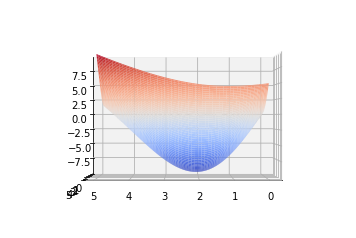

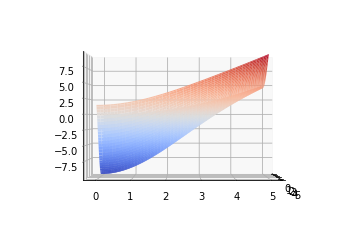

In [100]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(np.reshape(P1,(100,100)),np.reshape(P2,(100,100)),np.reshape(loss,(100,100)),cmap=cm.coolwarm)
ax.view_init(elev =0, azim=90)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(np.reshape(P1,(100,100)),np.reshape(P2,(100,100)),np.reshape(loss,(100,100)),cmap=cm.coolwarm)
ax.view_init(elev =0, azim=0)
plt.show()


## Part B Answer

## Part C Answer